<a href="https://colab.research.google.com/github/JoDeMiro/FuzzyLogic/blob/main/Python_Fuzzy_Nem_interakt%C3%ADv_kezdetleges_pr%C3%B3ba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teljesen új, az alapokat bemutato Fuzzy Logic példa

In [1]:
%%capture
!pip install scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

### Tagsági függvények deffiniálása

In [3]:
x1 = ctrl.Antecedent(np.arange(0, 7.1, 0.1), 'x1')

x2 = ctrl.Antecedent(np.arange(0, 7.1, 0.1), 'x2')

y  = ctrl.Consequent(np.arange(0, 7.1, 0.1), 'y')

No handles with labels found to put in legend.


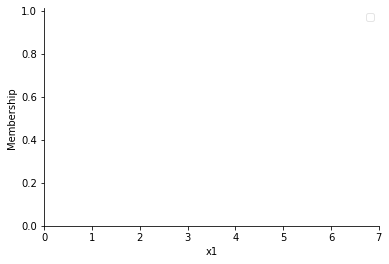

In [4]:
x1.view()

In [5]:
x1.universe

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [6]:
x1['low'] = fuzzy.trimf(x1.universe, [1.0, 2.5, 4])

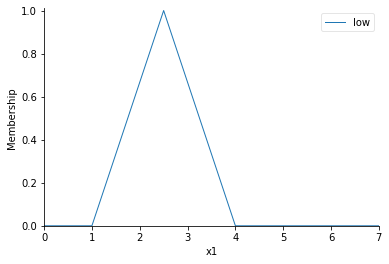

In [7]:
x1.view()

In [8]:
x1['high'] = fuzzy.trimf(x1.universe, [2.0, 3.5, 5.0])

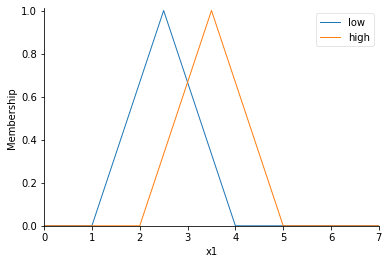

In [9]:
x1.view()

In [10]:
x1.defuzzify_method = 'centroid'      # Center of Gravity

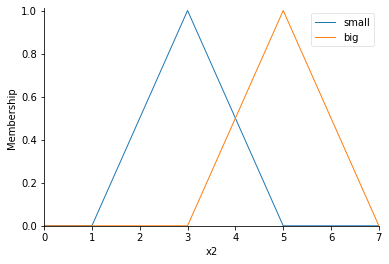

In [11]:
x2['small'] = fuzzy.trimf(x2.universe, [1.0, 3.0, 5.0])
x2['big']   = fuzzy.trimf(x2.universe, [3.0, 5.0, 7.0])

x2.view()

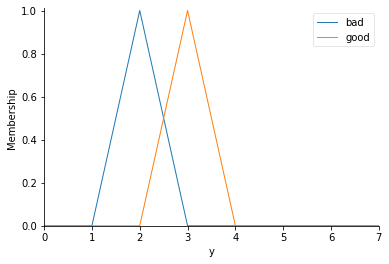

In [12]:
y['bad']  = fuzzy.trimf(y.universe, [1.0, 2.0, 3.0])
y['good'] = fuzzy.trimf(y.universe, [2.0, 3.0, 4.0])

y.view()

In [13]:
rule1 = ctrl.Rule(antecedent = x1['low'] & x2['small'], consequent = y['bad'])
rule2 = ctrl.Rule(antecedent = x1['high'] & x2['big'], consequent = y['good'])

In [14]:
system1 = ctrl.ControlSystem([rule1])

In [15]:
simulation1 = ctrl.ControlSystemSimulation(system1)

In [16]:
simulation1.input['x1'] = 2.5
simulation1.input['x2'] = 4.0

In [17]:
simulation1.compute()

y  : 1.9999999999999998
x1 : 2.5
x2 : 4.0



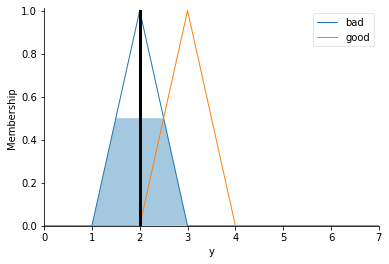

In [18]:
y.view(sim = simulation1)

print('y  :', simulation1.output['y'])

print(simulation1.input)

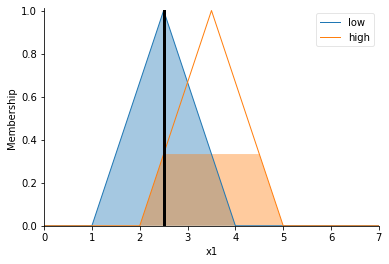

In [19]:
x1.view(sim = simulation1)

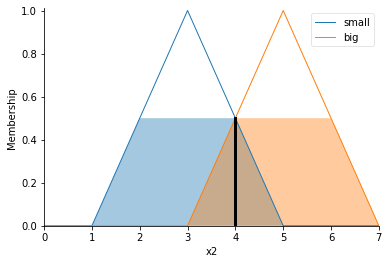

In [20]:
x2.view(sim = simulation1)



```
Ha a  x1     = 2.5   akkor low   1.0 és high 0.33
Ha az x2     = 4.0   akkor small 0.5 és big  0.5
 
Rule1 = Ha a x1['low'](1.0) és x2['small'](0.5) akkor y['bad']
 
 
Tehát 1.0 * bad és 0.0 * good
 
y = (1.0*2+0.0*4)/(1.0+0.0) = 2/1 = 2
 
A 2 azért mert az y ott kezdődik növekedni a bad
A 4 azért mert az y ott és véget a good
 
 
Másképpen fogalmazva 1 bad értékhez 2 pont y tartozik
és 1 good értékhez 3 pont y tartozik és ennek a kettőnek de ennek nem tagja
tehát az utóbbi értéket 0-val kell szorozni
lásd a y.view(sim = simulation1 ) ábrát
```



y  : 1.9999999999999998
x1 : 2.5
x2 : 4.0



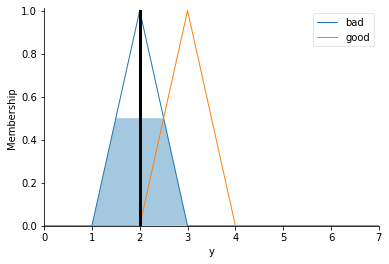

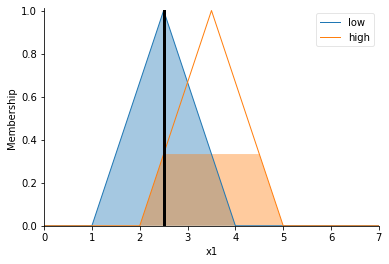

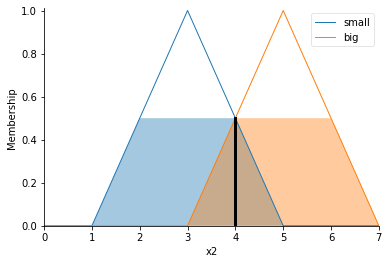

In [21]:
rule1 = ctrl.Rule(antecedent = x1['low'] & x2['small'], consequent = y['bad'])
rule2 = ctrl.Rule(antecedent = x1['high'] & x2['big'], consequent = y['good'])

system1 = ctrl.ControlSystem([rule1])

simulation1 = ctrl.ControlSystemSimulation(system1)

simulation1.input['x1'] = 2.5
simulation1.input['x2'] = 4.0


simulation1.compute()


y.view(sim = simulation1) # 50%-ban (0.5) tagja az y['bad'] tagsági függvények
                          # 0%-ban  (0.0) tagja az y['good'] tagsági függvénynek
                          # ezért az y['bad'] középértékét = 2.0 fogja megkapni
                          # a defuzzifikációnál

print('y  :', simulation1.output['y'])
print(simulation1.input)

x1.view(sim = simulation1)
x2.view(sim = simulation1)

y  : 1.9999999999999996
x1 : 3.5
x2 : 4.0



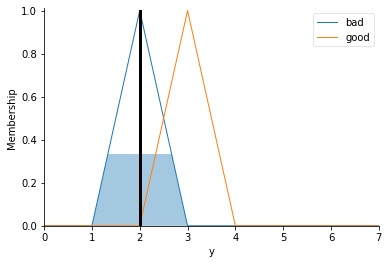

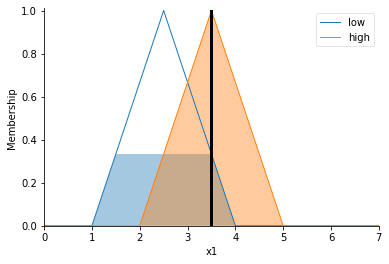

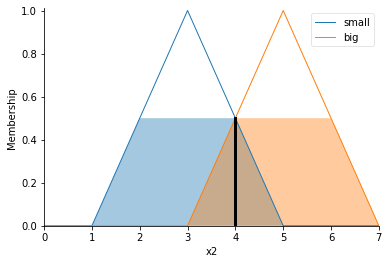

In [22]:
rule1 = ctrl.Rule(antecedent = x1['low'] & x2['small'], consequent = y['bad'])
rule2 = ctrl.Rule(antecedent = x1['high'] & x2['big'], consequent = y['good'])

system1 = ctrl.ControlSystem([rule1])

simulation1 = ctrl.ControlSystemSimulation(system1)

simulation1.input['x1'] = 3.5
simulation1.input['x2'] = 4.0


simulation1.compute()


y.view(sim = simulation1) # 50%-ban (0.5) tagja az y['bad'] tagsági függvények
                          # 0%-ban  (0.0) tagja az y['good'] tagsági függvénynek
                          # ezért az y['bad'] középértékét = 2.0 fogja megkapni
                          # a defuzzifikációnál

                          # az elöző példánál maradva korábban x1['low'](1.0)
                          #                                    x1['high'](0.33)
                          # most visztont                      x1['low'](0.33)
                          #                                    x1['high'](1.0)

                          # a végeredményen azonban ez nem változtat, mert
                          # az y tagsági függvény sohasem veszi fel a 'good'
                          # értéket
                          # továbbra is csak y['bad'](0.33) de ennek a tagsági
                          # függvénynek a középértéke (2 + 4)/2 = 2
                          # tehát y a defuzzyfikáció után = 2

print('y  :', simulation1.output['y'])
print(simulation1.input)

x1.view(sim = simulation1)
x2.view(sim = simulation1)

y  : 2.9999999999999996
x1 : 2.5
x2 : 4.0



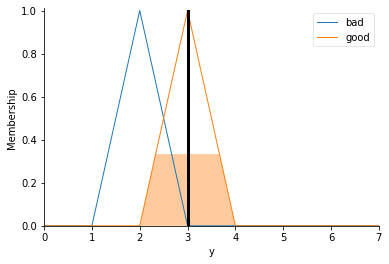

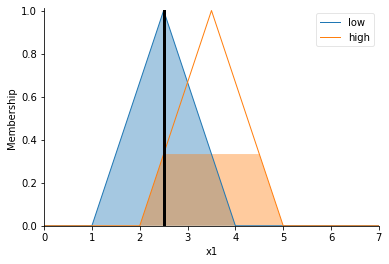

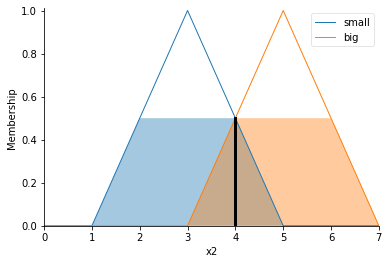

In [23]:
rule1 = ctrl.Rule(antecedent = x1['low'] & x2['small'], consequent = y['bad'])
rule2 = ctrl.Rule(antecedent = x1['high'] & x2['big'], consequent = y['good'])

system1 = ctrl.ControlSystem([rule2]) # -> figyelem csak a második szabály van

simulation1 = ctrl.ControlSystemSimulation(system1)

simulation1.input['x1'] = 2.5
simulation1.input['x2'] = 4.0


simulation1.compute()


y.view(sim = simulation1) # 33%-ban (0.33) tagja az y['good'] tagsági függvények
                          # 0%-ban  (0.0) tagja az y['bad'] tagsági függvénynek
                          # ezért az y['good'] középértékét = 3.0 fogja megkapni
                          # a defuzzifikációnál

print('y  :', simulation1.output['y'])
print(simulation1.input)

x1.view(sim = simulation1)
x2.view(sim = simulation1)

y  : 2.500000000000001
x1 : 3.0
x2 : 4.0



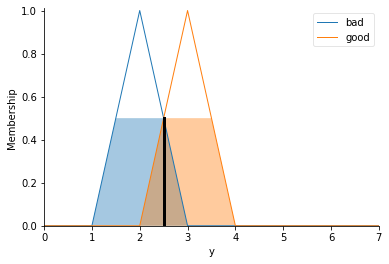

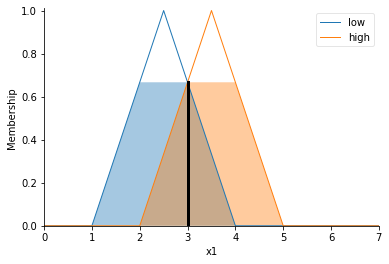

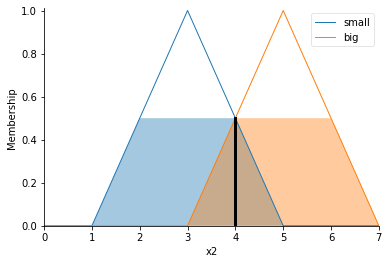

In [24]:
rule1 = ctrl.Rule(antecedent = x1['low'] & x2['small'], consequent = y['bad'])
rule2 = ctrl.Rule(antecedent = x1['high'] & x2['big'], consequent = y['good'])

system1 = ctrl.ControlSystem([rule1, rule2]) # -> 2 szabály van

simulation1 = ctrl.ControlSystemSimulation(system1)

simulation1.input['x1'] = 3.0
simulation1.input['x2'] = 4.0


simulation1.compute()


y.view(sim = simulation1) # úgy állítottam be x1 és x2 kettő értékét
                          # hogy mind az x1 tagsági függvényen, mind az x2
                          # tagsági függvényen olyan értéket kapjon amitől
                          # 50%-ban (0.5) lesz tagja egyik és 50%-ban a másik
                          # taggsági függvénynek is

print('y  :', simulation1.output['y'])
print(simulation1.input)

x1.view(sim = simulation1)
x2.view(sim = simulation1)

y  : 2.410507741347906
x1 : 2.5
x2 : 4.0



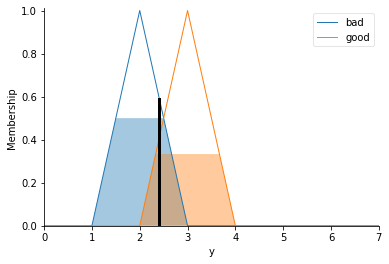

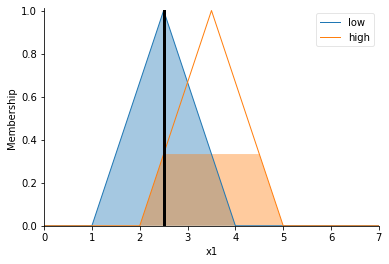

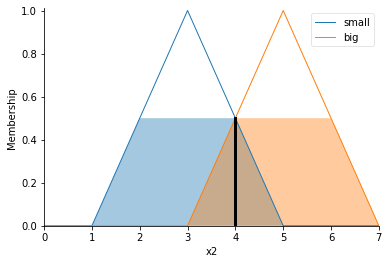

In [25]:
rule1 = ctrl.Rule(antecedent = x1['low'] & x2['small'], consequent = y['bad'])
rule2 = ctrl.Rule(antecedent = x1['high'] & x2['big'], consequent = y['good'])

system1 = ctrl.ControlSystem([rule1, rule2]) # -> 2 szabály van

simulation1 = ctrl.ControlSystemSimulation(system1)

simulation1.input['x1'] = 2.5
simulation1.input['x2'] = 4.0


simulation1.compute()


y.view(sim = simulation1) # x1(2.5) -> x1['low'](1.0), x1['high'](0.33)
                          # x2(4.0) -> x2['small'](0.5), x2['big'](0.5)
                          #
                          # x1['low']  and x2['small'] -> y['bad']
                          # x1['high'] and x2['big']   -> y['good']
                          #
                          # a beneneti értékek alapján y[] mindkét tagsági
                          # függvényébe bele fog tartozni ilyen olyan mértékben
                          #
                          # x2['small'] középértéke ((1+5)/2) = 3
                          # x2['big']   középértéke ((3+7)/2) = 5
                          #
                          # x1['low']   középértéke ((1+4)/2) = 2.5
                          # x1['high']  középértéke ((2+5)/2) = 3.5
                          #
                          # x1(2.5) -> [low](1*2.5) + [high](0.33*3.5) / (1+0.33) = 3.655/1.33 = 2.74812030075
                          # x2(4.0) -> [small](0.5*3) + [big](0.5*5) / (0.5+0.5) = 4/1 = 4
                          #
                          # y[bad]  = középértéke 2
                          # y[good] = középértéke 3

                          # na most a barátunk valamiért 0.5-re rossz és 0.33 jó
                          # y -> y[bad]0.5*2 + y[good]0.33*3 = 1.99 / (0.5 + 0.33) = 2.3880955
                          #
                          # y -> ( y[bad]középértéke(2) * y[bad]milyen_mértékben_tagja(0.5) + y[good](középértéke)(3) * y[good]milyen_mértékben_tagja(0.33) ) /
                          #      ( y[bad]milyen_mértékben_volt_tagja) + (y[good]milyen_mértékben_volt_tagja)
                          #
                          # Na most már csak azt kéne tudni, hogy a két szabály és a bemenet alapján ezen bemenetek alapján miért 0.5-ben részese y[bad]
                          # és miért 0.33-ban részese y[good]
                          #
                          # Ha jól sejtem a két szabály alapján mivel és kapcsolat van x1 bement és x2 bement között ezért azt a tagsági értéket veszi
                          # amelyik alacsonyabb
                          #
                          # Az x1[low](1.0) de az x2[small](0.5)
                          #
                          # A szabály alapján (rule1) tehát IF x1[low] AND x2[small] THEN y[bad]
                          #
                          # De hogy y[bad] = értéke mi lesz, az a szabályból következik (mivel és kapcsolat van ezért az alacsonyabb értéket kapja meg)

print('y  :', simulation1.output['y'])
print(simulation1.input)

x1.view(sim = simulation1)
x2.view(sim = simulation1)

y  : 2.3336016282727354
x1 : 2.5
x2 : 4.0



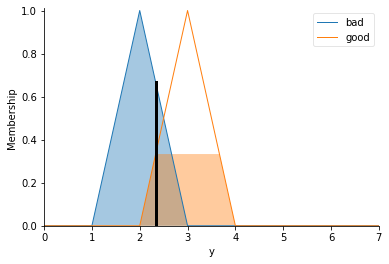

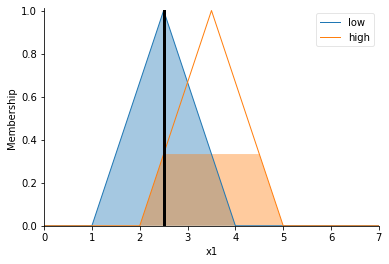

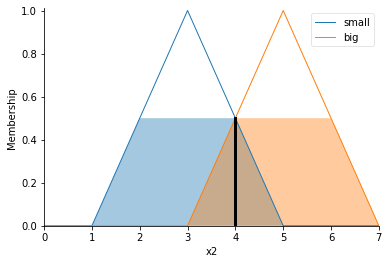

In [26]:
rule1 = ctrl.Rule(antecedent = x1['low'] | x2['small'], consequent = y['bad'])
rule2 = ctrl.Rule(antecedent = x1['high'] & x2['big'], consequent = y['good'])

system1 = ctrl.ControlSystem([rule1, rule2]) # -> 2 szabály van

simulation1 = ctrl.ControlSystemSimulation(system1)

simulation1.input['x1'] = 2.5
simulation1.input['x2'] = 4.0


simulation1.compute()


y.view(sim = simulation1) # x1(2.5) -> x1['low'](1.0), x1['high'](0.33)
                          # x2(4.0) -> x2['small'](0.5), x2['big'](0.5)
                          #
                          # x1['low']  and x2['small'] -> y['bad']
                          # x1['high'] and x2['big']   -> y['good']
                          #
                          # a beneneti értékek alapján y[] mindkét tagsági
                          # függvényébe bele fog tartozni ilyen olyan mértékben
                          #
                          # x2['small'] középértéke ((1+5)/2) = 3
                          # x2['big']   középértéke ((3+7)/2) = 5
                          #
                          # x1['low']   középértéke ((1+4)/2) = 2.5
                          # x1['high']  középértéke ((2+5)/2) = 3.5
                          #
                          # x1(2.5) -> [low](1*2.5) + [high](0.33*3.5) / (1+0.33) = 3.655/1.33 = 2.74812030075
                          # x2(4.0) -> [small](0.5*3) + [big](0.5*5) / (0.5+0.5) = 4/1 = 4
                          #
                          # y[bad]  = középértéke 2
                          # y[good] = középértéke 3

                          # na most a barátunk valamiért 0.5-re rossz és 0.33 jó
                          # y -> y[bad]0.5*2 + y[good]0.33*3 = 1.99 / (0.5 + 0.33) = 2.3880955
                          #
                          # y -> ( y[bad]középértéke(2) * y[bad]milyen_mértékben_tagja(0.5) + y[good](középértéke)(3) * y[good]milyen_mértékben_tagja(0.33) ) /
                          #      ( y[bad]milyen_mértékben_volt_tagja) + (y[good]milyen_mértékben_volt_tagja)
                          #
                          # Na most már csak azt kéne tudni, hogy a két szabály és a bemenet alapján ezen bemenetek alapján miért 0.5-ben részese y[bad]
                          # és miért 0.33-ban részese y[good]
                          #
                          # Ha jól sejtem a két szabály alapján mivel és kapcsolat van x1 bement és x2 bement között ezért azt a tagsági értéket veszi
                          # amelyik alacsonyabb
                          #
                          # Az x1[low](1.0) de az x2[small](0.5)
                          #
                          # A szabály alapján (rule1) tehát IF x1[low] AND x2[small] THEN y[bad]
                          #
                          # De hogy y[bad] = értéke mi lesz, az a szabályból következik (mivel és kapcsolat van ezért az alacsonyabb értéket kapja meg)
                          #
                          # Nos most annyi történt, hogy a rule1 szabályrendszert átirtam AND helyett OR kapcsolatra
                          # és láss csodát, mivel a rule1 az y[bad] tagsági függvényhez van rendelve, valóban a bementi tagsági függvények közül (x1, x2)
                          # a magasabb értéket kapja meg
                          #
                          # x1(2.5) -> [low](1.0) -> y[bad] = 1.0 (amikor AND kapcsolat volt akkor ez az érték 0.5 lett)

print('y  :', simulation1.output['y'])
print(simulation1.input)

x1.view(sim = simulation1)
x2.view(sim = simulation1)

y  : 2.4166666666666674
x1 : 2.5
x2 : 4.0



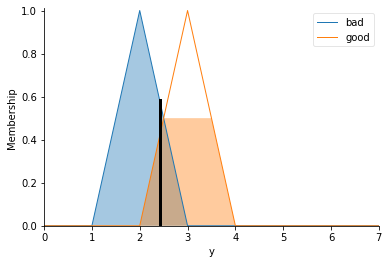

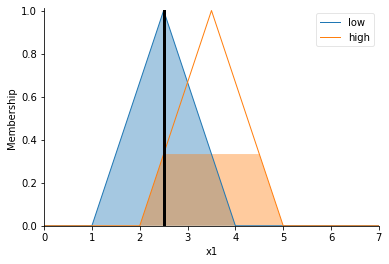

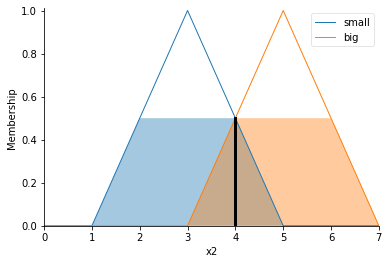

In [27]:
rule1 = ctrl.Rule(antecedent = x1['low'] | x2['small'], consequent = y['bad'])
rule2 = ctrl.Rule(antecedent = x1['high'] | x2['big'], consequent = y['good'])

# rule1 = ctrl.Rule(antecedent = x1['low'] & x2['small'], consequent = y['bad'], and_func=np.multiply)
# rule2 = ctrl.Rule(antecedent = x1['high'] & x2['big'], consequent = y['good'], and_func=np.multiply)


system1 = ctrl.ControlSystem([rule1, rule2]) # -> 2 szabály van

simulation1 = ctrl.ControlSystemSimulation(system1)

simulation1.input['x1'] = 2.5
simulation1.input['x2'] = 4.0


simulation1.compute()


y.view(sim = simulation1) # x1(2.5) -> x1['low'](1.0), x1['high'](0.33)
                          # x2(4.0) -> x2['small'](0.5), x2['big'](0.5)
                          #
                          # x1['low']  and x2['small'] -> y['bad']
                          # x1['high'] and x2['big']   -> y['good']
                          #
                          # a beneneti értékek alapján y[] mindkét tagsági
                          # függvényébe bele fog tartozni ilyen olyan mértékben
                          #
                          # x2['small'] középértéke ((1+5)/2) = 3
                          # x2['big']   középértéke ((3+7)/2) = 5
                          #
                          # x1['low']   középértéke ((1+4)/2) = 2.5
                          # x1['high']  középértéke ((2+5)/2) = 3.5
                          #
                          # x1(2.5) -> [low](1*2.5) + [high](0.33*3.5) / (1+0.33) = 3.655/1.33 = 2.74812030075
                          # x2(4.0) -> [small](0.5*3) + [big](0.5*5) / (0.5+0.5) = 4/1 = 4
                          #
                          # y[bad]  = középértéke 2
                          # y[good] = középértéke 3

                          # na most a barátunk valamiért 0.5-re rossz és 0.33 jó
                          # y -> y[bad]0.5*2 + y[good]0.33*3 = 1.99 / (0.5 + 0.33) = 2.3880955
                          #
                          # y -> ( y[bad]középértéke(2) * y[bad]milyen_mértékben_tagja(0.5) + y[good](középértéke)(3) * y[good]milyen_mértékben_tagja(0.33) ) /
                          #      ( y[bad]milyen_mértékben_volt_tagja) + (y[good]milyen_mértékben_volt_tagja)
                          #
                          # Na most már csak azt kéne tudni, hogy a két szabály és a bemenet alapján ezen bemenetek alapján miért 0.5-ben részese y[bad]
                          # és miért 0.33-ban részese y[good]
                          #
                          # Ha jól sejtem a két szabály alapján mivel és kapcsolat van x1 bement és x2 bement között ezért azt a tagsági értéket veszi
                          # amelyik alacsonyabb
                          #
                          # Az x1[low](1.0) de az x2[small](0.5)
                          #
                          # A szabály alapján (rule1) tehát IF x1[low] AND x2[small] THEN y[bad]
                          #
                          # De hogy y[bad] = értéke mi lesz, az a szabályból következik (mivel és kapcsolat van ezért az alacsonyabb értéket kapja meg)
                          #
                          # Nos most annyi történt, hogy a rule1 szabályrendszert átirtam AND helyett OR kapcsolatra
                          # és láss csodát, mivel a rule1 az y[bad] tagsági függvényhez van rendelve, valóban a bementi tagsági függvények közül (x1, x2)
                          # a magasabb értéket kapja meg
                          #
                          # x1(2.5) -> [low](1.0) -> y[bad] = 1.0 (amikor AND kapcsolat volt akkor ez az érték 0.5 lett)
                          #
                          # Rule2 is átírtam AND helyett OR kapcsolatra
                          #
                          # rule2 = ctrl.Rule(antecedent = x1['high'] | x2['big'], consequent = y['good'])
                          #
                          # x1(2.5) -> x['high'] = 0.33
                          # x2(4.0) -> x['big']  = 0.5
                          #
                          # fenti szabály alapján
                          # y['good'] tagsági értéke = x1['high'] OR x2['big']
                          # y['good'] = 0.33 OR 0.5
                          #
                          # úgy tűnik hogy ha a szabály VAGY (OR) (|) akkor a magasabb értéket rendeli a kimenethez
                          #
                          # kicsit beleolvastam a ctrl.Rule() metodusba
                          #
                          # S valóban paraméterként megadható neki, hogy az AND az OR logikai kapcsolók esetén
                          # hogyan számolja a bemenetek alapján a kimeneti értékeket.
                          #
                          # AND esetében np.fmin()
                          # OR  esetében np.fmax()
                          #
                          # Csak érdekesség képpen jegyzem meg, hogy amiről a tanárnő beszélt,
                          # az is lehetsége, hogy két érték közül nem a nagyobbat, vagy a kisebbet
                          # választjuk, hanem összeszorozzuk őket
                          # np.multiply
                          # rule2 = ctrl.Rule(antecedent = x1['high'] & x2['big'], consequent = y['good'], and_func=np.fmin)
                          

rule2 = ctrl.Rule(antecedent = x1['high'] & x2['big'], consequent = y['good'], and_func=np.multiply)

print('y  :', simulation1.output['y'])
print(simulation1.input)

x1.view(sim = simulation1)
x2.view(sim = simulation1)

In [28]:
help(ctrl.Rule)

Help on class Rule in module skfuzzy.control.rule:

class Rule(builtins.object)
 |  Rule(antecedent=None, consequent=None, label=None, and_func=<ufunc 'fmin'>, or_func=<ufunc 'fmax'>)
 |  
 |  Rule in a fuzzy control system, connecting antecedent(s) to consequent(s).
 |  
 |  Parameters
 |  ----------
 |  antecedent : Antecedent term(s) or logical combination thereof, optional
 |      Antecedent terms serving as inputs to this rule. Multiple terms may
 |      be combined using operators `|` (OR), `&` (AND), `~` (NOT), and
 |      parentheticals to group terms.
 |  consequent : Consequent term(s), optional
 |      Consequent terms serving as outputs from this rule. Multiple terms may
 |      be accepted in four formats:
 |  
 |      Unweighted single output.
 |          output['term']
 |      Weighted single output
 |          (output['term']%0.5)
 |      Unweighted multiple output
 |          (output1['term1'], output2['term2'])
 |      Weighted multiple output
 |          ((output1['t